# Pizza Price Prediction Using Machine Learning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('pizza.csv')

In [3]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [5]:
data.shape
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 129
Number of Columns 9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


# Check Null Values In The Dataset

In [7]:
data.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

# Get Overall Statistics About The  Dataset 

In [8]:
data.describe().T

,count,unique,top,freq
company,129,5,C,30
price_rupiah,129,43,"Rp72,000",11
diameter,129,12,12 inch,49
topping,129,12,chicken,29
variant,129,20,classic,30
size,129,6,medium,41
extra_sauce,129,2,yes,76
extra_cheese,129,2,yes,86
extra_mushrooms,129,2,yes,72


# Data Preprocessing

In [9]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [10]:
data.rename({'price_rupiah': 'price'}, axis=1, inplace=True)

In [11]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [12]:
data['price'] = data['price'].str.replace("Rp","")
data['price'] = data['price'].str.replace(",","").astype('int32')

In [13]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [15]:
# The rupiah is the currency of Indonesia. 
#To convert it into Indian rupees, we multiply the amount in rupiah by 0.0054.
def convert(value):
    return value*0.0054

In [16]:
data['price'] = data['price'].apply(convert)

In [17]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [18]:
data['diameter'] = data['diameter'].str.replace("inch","")
data['diameter'] = data['diameter'].str.replace(" ","").astype('float32')

In [19]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [20]:
data['price'].max()

1339.2

# Data Analysis

# 1.Univariate Analysis

In [21]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

# Company

In [22]:
data['company'].value_counts()

company
C    30
E    30
A    25
B    24
D    20
Name: count, dtype: int64

# Price

In [23]:
import matplotlib.pyplot as plt

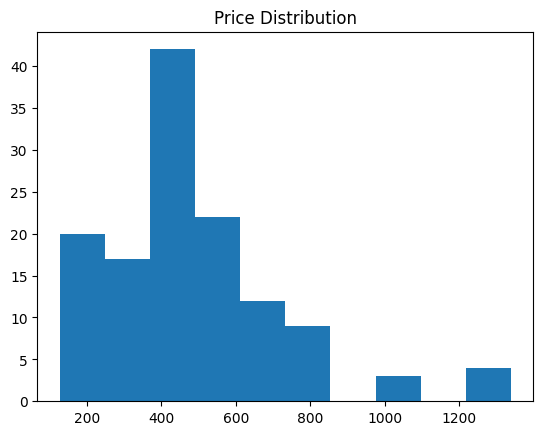

In [24]:
plt.hist(x = "price", data = data)
plt.title("Price Distribution")
plt.show()

# Diameter

In [25]:
data['diameter'].value_counts()

diameter
12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: count, dtype: int64

In [26]:
import seaborn as sns

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\2751104638.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diameter', data=data, palette='Set2')


<Axes: xlabel='diameter', ylabel='count'>

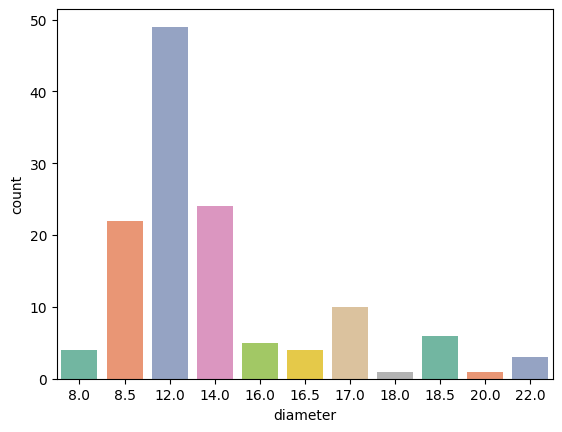

In [27]:
sns.countplot(x='diameter', data=data, palette='Set2')

# Topping

In [28]:
data['topping'].value_counts()

topping
chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: count, dtype: int64

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\1623963531.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='topping', data=data, palette='Set2')


<Axes: xlabel='count', ylabel='topping'>

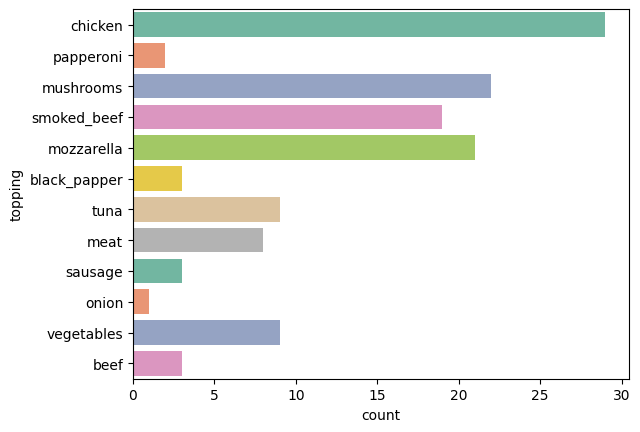

In [29]:
sns.countplot(y='topping', data=data, palette='Set2')

In [30]:
data['variant'].value_counts()

variant
classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: count, dtype: int64

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\642715478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['variant'],palette='Set2')


<Axes: xlabel='count', ylabel='variant'>

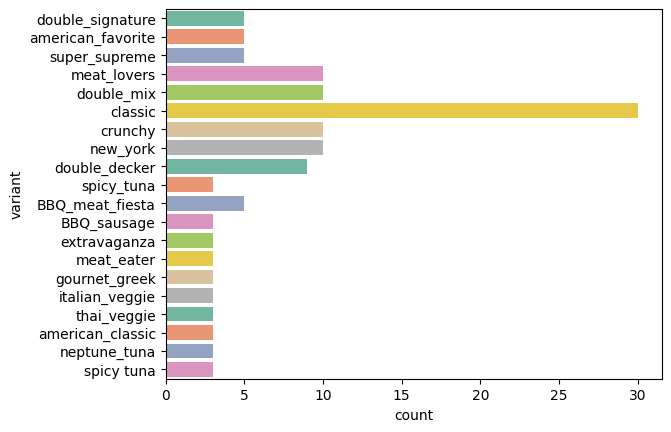

In [31]:
sns.countplot(y=data['variant'],palette='Set2')

Size

In [32]:
data['size'].value_counts()

size
medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: count, dtype: int64

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\301146318.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['size'],palette='Set2')


<Axes: xlabel='size', ylabel='count'>

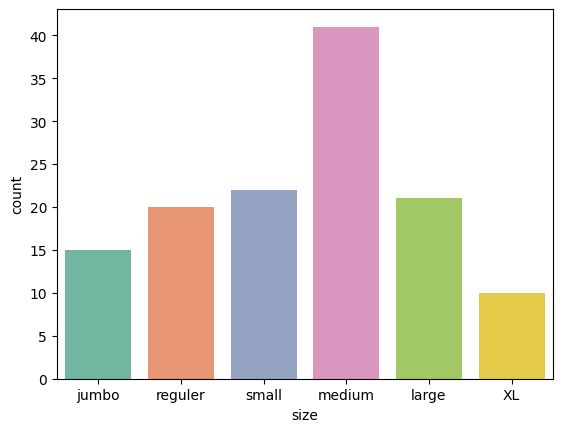

In [33]:
sns.countplot(x=data['size'],palette='Set2')

Extra Sauce

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\3895880705.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['extra_sauce'],palette='Set2')


<Axes: xlabel='count', ylabel='extra_sauce'>

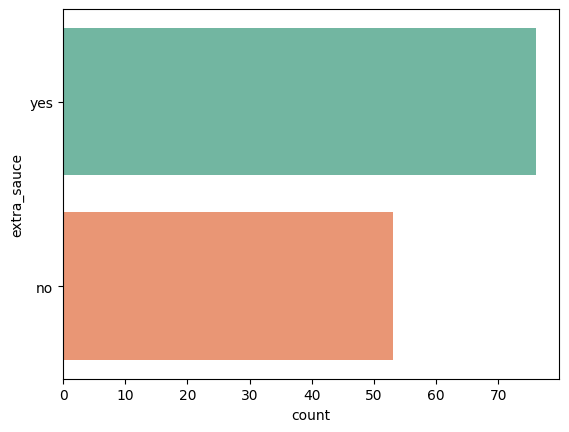

In [34]:
sns.countplot(y=data['extra_sauce'],palette='Set2')

Extra Cheese

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\1314348805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['extra_cheese'],palette='Set2')


<Axes: xlabel='extra_cheese', ylabel='count'>

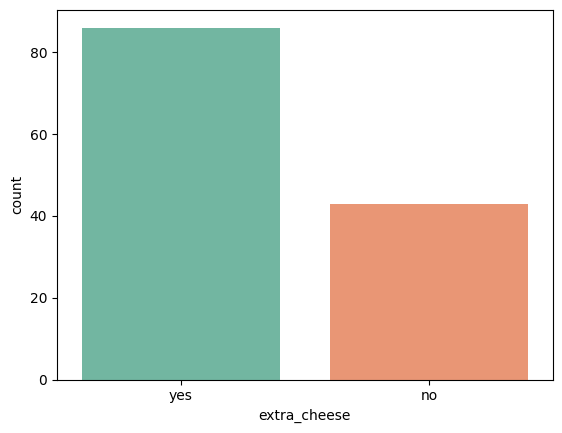

In [35]:
sns.countplot(x=data['extra_cheese'],palette='Set2')

Extra Mushrooms

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\3873975226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['extra_mushrooms'],palette='Set2')


<Axes: xlabel='extra_mushrooms', ylabel='count'>

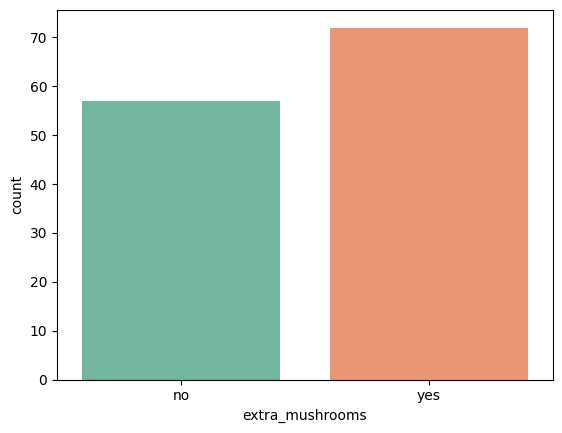

In [36]:
sns.countplot(x=data['extra_mushrooms'],palette='Set2')

# Variant

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\2092136599.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='variant', data=data, palette='Set2')


<Axes: xlabel='count', ylabel='variant'>

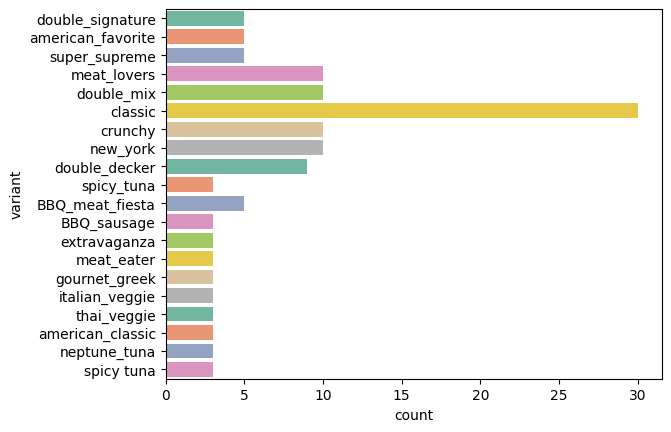

In [37]:
sns.countplot(y='variant', data=data, palette='Set2')

# Size

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\1430246675.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='size', data=data, palette='Set2')


<Axes: xlabel='count', ylabel='size'>

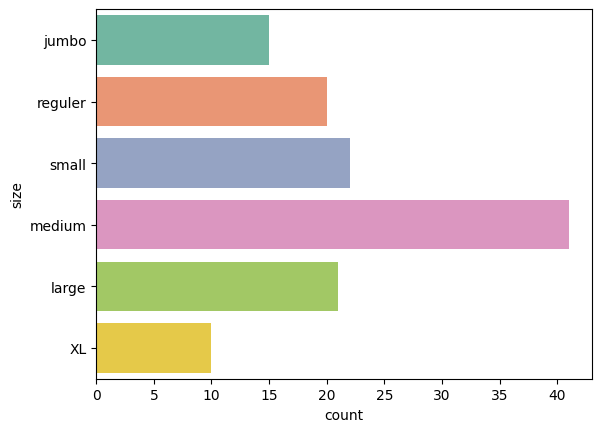

In [38]:
sns.countplot(y='size', data=data, palette='Set2')

# Extra Sauce

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\1643127896.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='extra_sauce', data=data, palette='Set2')


<Axes: xlabel='extra_sauce', ylabel='count'>

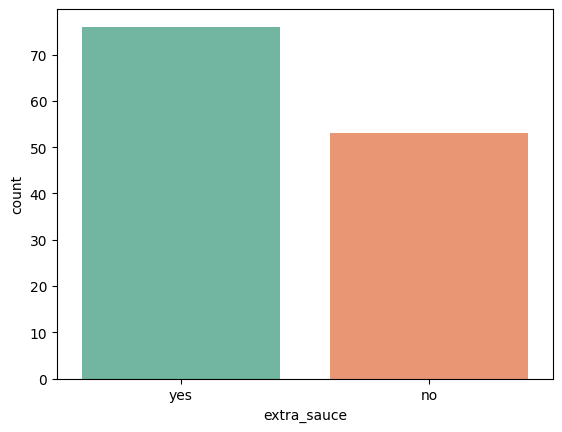

In [39]:
sns.countplot(x='extra_sauce', data=data, palette='Set2')

# Extra Cheese

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\3831188895.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='extra_cheese', data=data, palette='Set2')


<Axes: xlabel='count', ylabel='extra_cheese'>

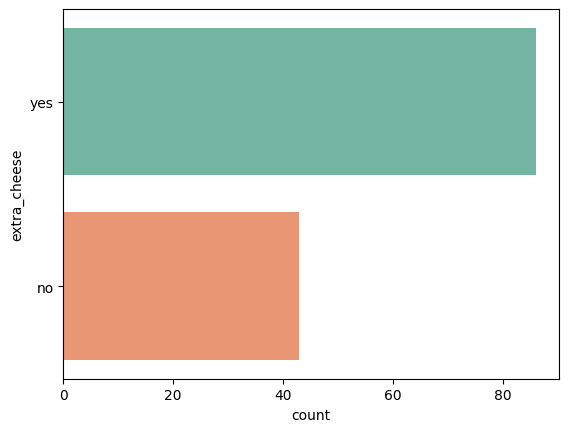

In [40]:
sns.countplot(y='extra_cheese', data=data, palette='Set2')

# Extra Mushrooms

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\129274642.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='extra_mushrooms', data=data, palette='Set2')


<Axes: xlabel='count', ylabel='extra_mushrooms'>

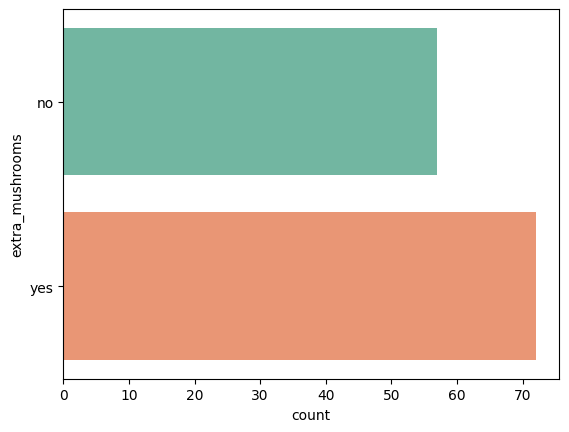

In [41]:
sns.countplot(y='extra_mushrooms', data=data, palette='Set2')

# 2.Bivariate Analysis 

# Price by Company

In [42]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\1860104739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company', y='price', data=data,palette='Set1')


<Axes: xlabel='company', ylabel='price'>

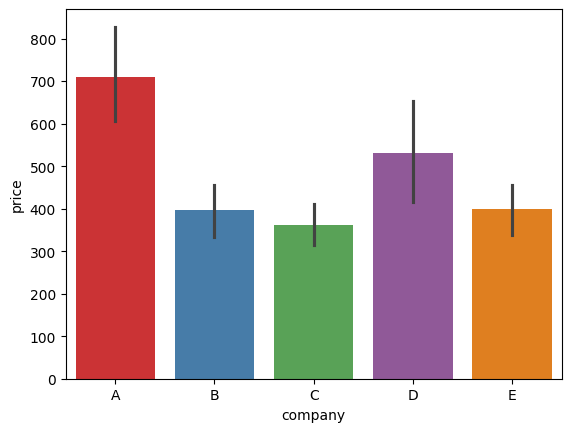

In [43]:
sns.barplot(x='company', y='price', data=data,palette='Set1')

# Price by Topping

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\4265472963.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', y='topping', data=data,palette='Set1')


<Axes: xlabel='price', ylabel='topping'>

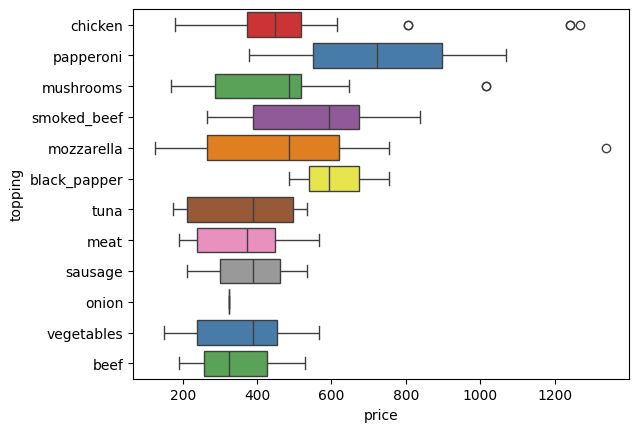

In [44]:
sns.boxplot(x='price', y='topping', data=data,palette='Set1')

# Price by Size

C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\355751768.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size', y='price', data=data,palette='Set1')


<Axes: xlabel='size', ylabel='price'>

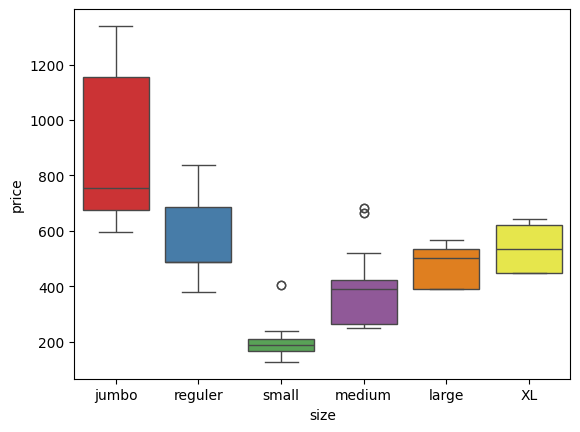

In [45]:
sns.boxplot(x='size', y='price', data=data,palette='Set1')

# Finding The Most Expensive Price

In [46]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [47]:
data['price'].max()

1339.2

In [48]:
data[data['price'].max() == data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


# Find Diameter of Jumbo Size Pizza

In [49]:
data[data['size'] == 'jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

# Find Diameter of XL Size Pizza

In [50]:
data[data['size'] == 'XL']['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

# Let's Remove Outliers

In [51]:
data[(data['size'] == 'jumbo') & (data['diameter'] <=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [52]:
data = data.drop(data.index[[6,11,16,80]])

In [53]:
data[(data['size'] == 'jumbo') & (data['diameter'] <=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


# Label Encoding

In [54]:
cat_col = data.select_dtypes(include = ['object']).columns

In [55]:
cat_col

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [56]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
en = LabelEncoder()
for i in cat_col:
    data[i]=en.fit_transform(data[i])

In [59]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


# Store Feature Matrix In X and Respose (Target) In Vector y

In [60]:
X = data.drop('price',axis=1)
y = data['price']

# Splitting The Dataset Into The Training Set And Test Set

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Import The Models

In [63]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Training

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Predict on Test Data

In [66]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

# Evaluating The Algorithm

In [67]:
from sklearn import metrics

In [68]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)
score5 = metrics.r2_score(y_test, y_pred5)

In [69]:
print(score1,
     score2,
     score3,
     score4,
     score5)

0.6712827779795159 -0.058422678416528706 0.8405182388462301 0.8877053631884877 0.8029020264469139


In [70]:
final_data = pd.DataFrame({'Models': ['LR', 'SVM', 'RF', 'GB', 'XGR'], 
              'R2_SCORE':[score1, score2,score3,score4,score5]})

In [71]:
final_data

,Models,R2_SCORE
0,LR,0.671283
1,SVM,-0.058423
2,RF,0.840518
3,GB,0.887705
4,XGR,0.802902


C:\Users\Omkar\AppData\Local\Temp\ipykernel_14956\3058674214.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='R2_SCORE', data=final_data, palette='Set1')


<Axes: xlabel='Models', ylabel='R2_SCORE'>

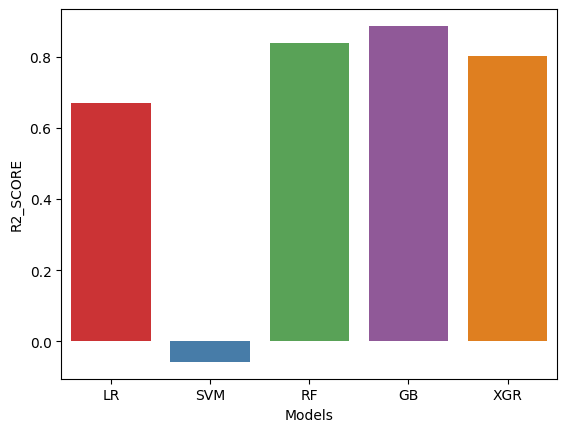

In [72]:
sns.barplot(x='Models', y='R2_SCORE', data=final_data, palette='Set1')

# Feature Importance

# Random Forest

In [73]:
rf.feature_importances_

array([0.02981159, 0.58404282, 0.03455201, 0.12460514, 0.18531777,
       0.0218907 , 0.01495388, 0.00482609])

In [74]:
feature = pd.Series(rf.feature_importances_, index=X_train.columns)

<Axes: >

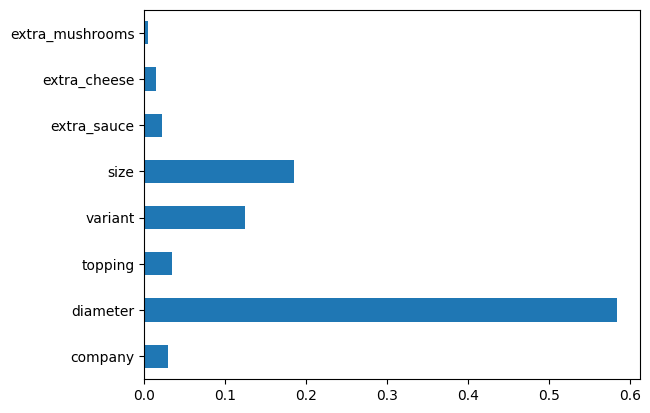

In [75]:
feature.plot(kind='barh')

# Gradient Boosting Regressor

In [76]:
gbr.feature_importances_

array([0.00628929, 0.63667369, 0.05343488, 0.1016259 , 0.16307373,
       0.03394016, 0.00253834, 0.00242401])

In [77]:
feature = pd.Series(gbr.feature_importances_, index=X_train.columns)

<Axes: >

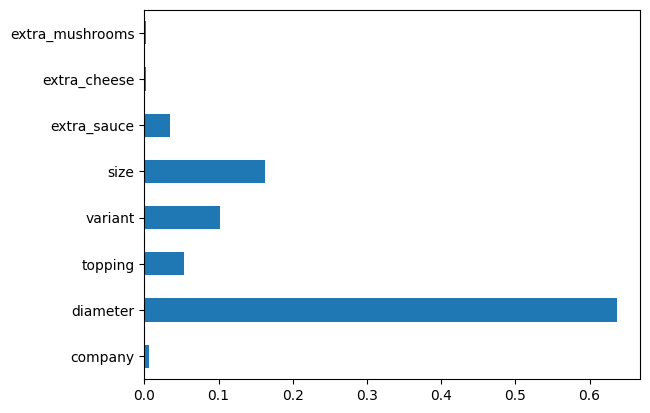

In [78]:
feature.plot(kind='barh')

# XGBRegressor

In [79]:
xg.feature_importances_

array([0.0080106 , 0.39336628, 0.01220485, 0.07297975, 0.44671908,
       0.05231223, 0.0084051 , 0.00600212], dtype=float32)

In [80]:
feature = pd.Series(xg.feature_importances_, index=X_train.columns)

<Axes: >

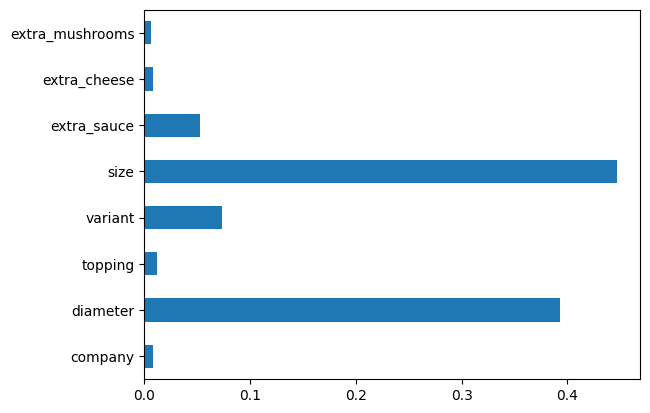

In [81]:
feature.plot(kind='barh')

# Save The Model

In [82]:
X = data.drop('price', axis=1)
y = data['price']

In [83]:
xgb = XGBRegressor()

In [84]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
import joblib 

In [86]:
joblib.dump(xgb,'Pizza_Price_Predict')

['Pizza_Price_Predict']

In [87]:
model = joblib.load('Pizza_Price_Predict')

# GUI

In [88]:
from tkinter import *

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    
    model = joblib.load('Pizza_Price_Predict')
    df  = pd.DataFrame({
        'company':p1,
        'diameter':p2,
        'topping':p3,
        'variant':p4,
        'size':p5,
        'extra_sauce':p6,
        'extra_cheese':p7,
        'extra_mushrooms': p8
}, index=[0])
    result = model.predict(df)
                       

master = Tk()
master.title("Pizza Price Prediction Using Machine Learning")
label = Label(master,text = "Pizza Price Prediction", bg = "black",
                fg = "white").grid(row=0,columnspan=2)
Label(master, text = "Company Name").grid(row=1)
Label(master, text = "Diameter of Pizza").grid(row=2)
Label(master, text = "Topping").grid(row=3)
Label(master, text = "Variant").grid(row=4)
Label(master, text = "Size").grid(row=5)
Label(master, text = "Extra_Sauce[1:yes,0:No]").grid(row=6)
Label(master, text = "Extra_Cheese[1:yes,0:No]").grid(row=7)
Label(master, text = "Extra_Mushrooms[1:yes,0:No]").grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master, text="Predict", command=show_entry).grid()

mainloop()